### Data pre processing of a csv dataset

#### This dataset focuses on the Trump-Era Tariffs by Country (2025), and we aim to perform data representation, data cleaning, data integration, data transformation, and data discretization for a thorough analysis.

We start by importing the necessary libraries and loading the dataset.
For visualizations we've used matplotlib and seaborn. 

Using pandas, we can easily manipulate and analyze the data.

Using matplotlib, we can create basic plots and charts like line graphs, bar charts, histograms, and more. 

Seaborn is built on top of matplotlib, using it we can make prettier and easier-to-read charts like boxplots, heatmaps, and more.


In [93]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we make a Python function for loading csv datatype and transforming it into a Python data structure.

In [94]:
# Now we need to load the dataset into a pandas DataFrame
dataset = 'Trump_tariffs_by_country.csv'

# We make a function to load the dataset
def load_csv_to_dataframe(file_path):
    df = pd.read_csv(file_path)
    return df

# And transform it into a DataFrame
df = load_csv_to_dataframe(dataset)

# Print the dataframe
df

,Country,Tariffs charged to USA,Reciprocal Tariffs
0,China,0.67,0.34
1,European Union,0.39,0.20
2,Vietnam,0.90,0.46
3,Taiwan,0.64,0.32
4,Japan,0.46,0.24
...,...,...,...
180,Togo,0.10,0.10
181,Ethiopia,0.10,0.10
182,Suriname,0.10,0.10
183,Ghana,0.17,0.10


Now we will explore and clean the data as needed.

##### Data Representation

In [95]:
# Print all the column names of the DataFrame
df.columns

Index(['Country', 'Tariffs charged to USA', 'Reciprocal Tariffs'], dtype='object')

In [96]:
# Find the total number of rows
df.index

RangeIndex(start=0, stop=185, step=1)

In [97]:
# A summary of the numerical columns in a DataFrame
df.describe()

,Tariffs charged to USA,Reciprocal Tariffs
count,185.000000,185.000000
mean,0.261622,0.162865
std,0.256406,0.109901
min,0.100000,0.100000
25%,0.100000,0.100000
50%,0.100000,0.100000
75%,0.390000,0.180000
max,0.990000,0.500000


In [98]:
# See the datatype of each column
df.dtypes

Country                    object
Tariffs charged to USA    float64
Reciprocal Tariffs        float64
dtype: object

##### Data Cleaning

In [99]:
# Find missing values for each column if they exits 
df.isna().sum()

Country                   0
Tariffs charged to USA    0
Reciprocal Tariffs        0
dtype: int64

In [100]:
# Find missing numbers for each column if they exits 
df.isnull().sum()

Country                   0
Tariffs charged to USA    0
Reciprocal Tariffs        0
dtype: int64

#### Above result shows that there are no missing values or missing numbers. 

If we had any missing values/numbers or n/a we would have used one of these methods: 

dropna(): which removes all the rows with missing details

or

mean imputation: where you can impute missing data using the functions mean() and fillna().




#### Anonymisation is not necessary, since there are no sensitive data.

##### Data Transformation

Our data is continuous, and since we want to analyze tariff rates as percentages, we’ll transform the values into discrete numerical data by converting them to percentage format.

In [101]:
# Transform the column data from float to int (percentage) for Tariffs charged to USA
df['Tariffs charged to USA'] = (df['Tariffs charged to USA'] * 100).round(0).astype(int)

In [102]:
# Transform the column data from float to int (percentage) for Reciprocal Tariffs
df['Reciprocal Tariffs'] = (df['Reciprocal Tariffs'] * 100).round(0).astype(int)

df

,Country,Tariffs charged to USA,Reciprocal Tariffs
0,China,67,34
1,European Union,39,20
2,Vietnam,90,46
3,Taiwan,64,32
4,Japan,46,24
...,...,...,...
180,Togo,10,10
181,Ethiopia,10,10
182,Suriname,10,10
183,Ghana,17,10


##### This graph shows the distribution of Tariff rates.

This histogram shows the distribution of tariff rates for both Tariffs charged to the USA (red) and Reciprocal Tariffs (blue). Most countries charge very low tariffs (under 10%) in both directions, but the red bars (tariffs charged to the USA) have a wider spread and more countries imposing higher tariffs, especially above 40%. 

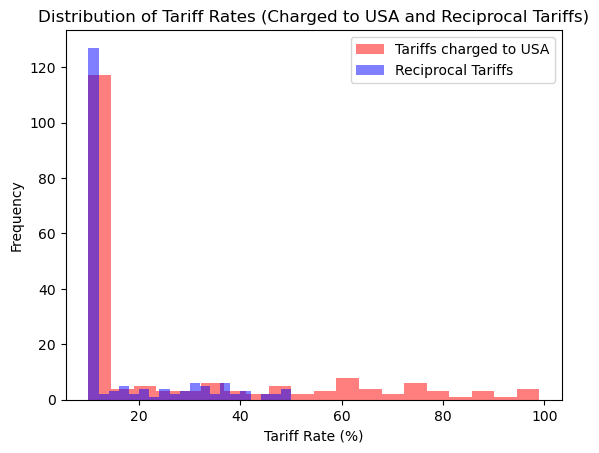

In [103]:
# Plot the histogram for both 'Tariffs charged to USA' and 'Reciprocal Tariffs'
plt.hist(df['Tariffs charged to USA'], bins=20, alpha=0.5, label='Tariffs charged to USA', color='red')
plt.hist(df['Reciprocal Tariffs'], bins=20, alpha=0.5, label='Reciprocal Tariffs', color='blue')

# Add title and labels
plt.title('Distribution of Tariff Rates (Charged to USA and Reciprocal Tariffs)')
plt.xlabel('Tariff Rate (%)')
plt.ylabel('Frequency')

# Show the legend
plt.legend()

# Display the plot
plt.show()

##### This graph compares the Tariffs Charged to USA vs Reciprocal Tariffs.

This boxplot shows that tariffs charged to the USA are generally higher and more varied than the reciprocal tariffs the USA charges in return. The median tariff is higher for tariffs charged to the USA, and there are more extreme outliers in that group. In contrast, reciprocal tariffs are lower and more consistent across countries.

/var/folders/2m/35grmzwx11n7k6l_7l4ycfhm0000gp/T/ipykernel_60969/2363990652.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tariff Type', y='Rate', data=melted_df, palette='Set2')


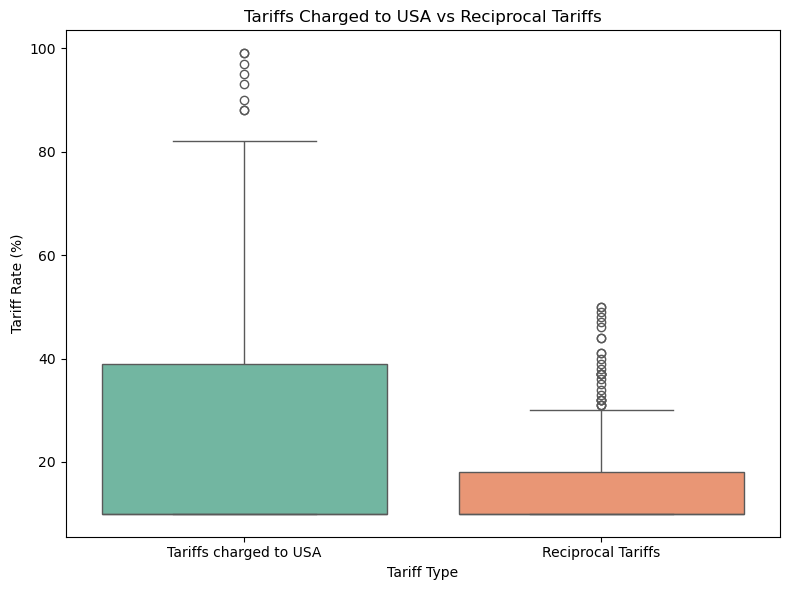

In [104]:
# Melt the DataFrame to long format for seaborn
melted_df = pd.melt(df, value_vars=['Tariffs charged to USA', 'Reciprocal Tariffs'],
                    var_name='Tariff Type', value_name='Rate')

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tariff Type', y='Rate', data=melted_df, palette='Set2')
plt.title('Tariffs Charged to USA vs Reciprocal Tariffs')
plt.xlabel('Tariff Type')
plt.ylabel('Tariff Rate (%)')
plt.tight_layout()
plt.show()

##### This graph shows the top 10 countries that charged the highest tariffs to the USA.

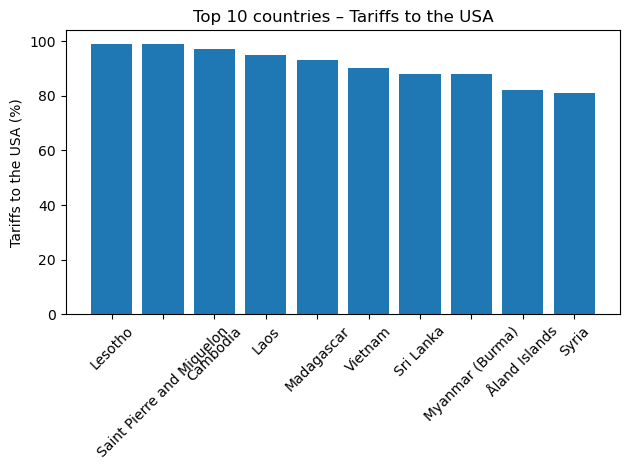

In [105]:
def plot_top10_tariffs(df):
    top10 = df.sort_values('Tariffs charged to USA', ascending=False).head(10)
    plt.bar(top10['Country'], top10['Tariffs charged to USA'])
    plt.xticks(rotation=45)
    plt.ylabel('Tariffs to the USA (%)')
    plt.title('Top 10 countries – Tariffs to the USA')
    plt.tight_layout()
    plt.show()

# Call the function to plot the top 10 tariffs
plot_top10_tariffs(df)

##### This graph shows the top 10 countries that received the highest tariffs from the USA.

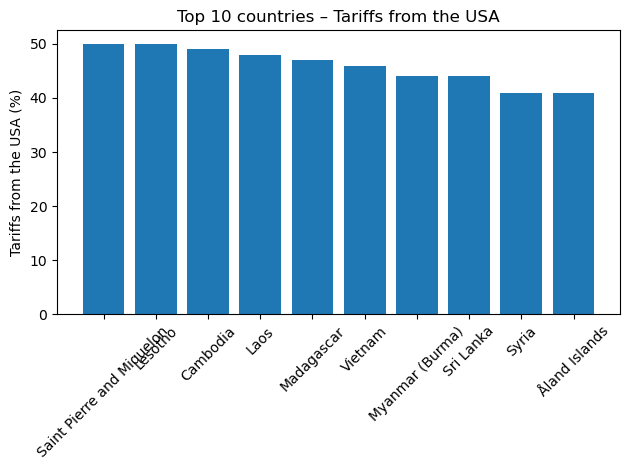

In [106]:
def plot_top10_us_tariffs(df):
    top10 = df.sort_values('Reciprocal Tariffs', ascending=False).head(10)
    plt.bar(top10['Country'], top10['Reciprocal Tariffs'])
    plt.xticks(rotation=45)
    plt.ylabel('Tariffs from the USA (%)')
    plt.title('Top 10 countries – Tariffs from the USA')
    plt.tight_layout()
    plt.show()

# Call the function to plot the top 10 tariffs
plot_top10_us_tariffs(df)